In the second part of this assignment, we will implement support vector machine and kernel support vector machine.

## **Preparation**
The following code is the preparation for importing packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as cvx

## **[Step 1-3] Soft margin support vector machine (SVM) implementation**

In this assignment, you should use only NumPy to build the SVM models.

**DO NOT** use other libraries to implement the SVM models.

**DO NOT** modify other parts of the skeleton code.

Follow the comments. They'll give you instructions on what to code.

### Step 1. Build the soft margin SVM models based on the gradient descent
The followings are the skeleton codes. Implement the functions inside the ```SVM``` class.

In [2]:
class SVM():
    def __init__(self, X_data, reg=1):
        # Initialize the model parameters as the instance variable.
        print("-"*50, "\nInitialize the parameters of our SVM.\n")
        self.W = np.random.randn(X_data.shape[1])
        self.w_0 = np.random.randn(1)
        self.reg = reg

    # Function for calculating the loss.
    def objective_function(self, X_data, y_label):
        # Define the objective function for the SVM classifier.
        ####################### IMPLEMENT HERE #######################
        distance = 1-y_label*(X_data.dot(self.W)+self.w_0) #음수가 올바르게 분류된 상황 (constraint 조건)
        distance[distance<0] = 0  #양수인 부분만 남김
        cost= 1/2*self.reg*self.W.T.dot(self.W) + np.sum(distance, axis=0)/X_data.shape[0] #*** #L2 regularization하고 잘못 예측한 차이값 더함

        ##############################################################
        return cost

    # Function for calculating the gradient
    def calculate_gradient(self, X_data, y_label):
        # Compute the gradient of W and w_0 from the entire epoch.
        ####################### IMPLEMENT HERE #######################
        distance=np.sign(1-y_label*(X_data.dot(self.W)+self.w_0))
        distance[distance<0]=0  #잘못 분류된 경우만 선택해서 사용하기 위함
        gradient_W = self.reg*self.W - np.sum((X_data.T*y_label*distance).T, axis=0)/X_data.shape[0] #*** #위의 cost함수를 w에 대해 미분한 결과
        gradient_w_0 = -np.sum(y_label*distance, axis=0) / X_data.shape[0]  #위의 cost함수를 w0에 대해 미분한 결과
        ##############################################################
        return gradient_W, gradient_w_0

    # Function for training
    def train(self, x_input, y_label, lr=0.01, epochs=50):
        # Update the model parameters (W, w_0) using the above calculate_gradient function.
        print("- Total Epochs \t\t: ", epochs)
        print("- Learning rate \t: ", lr)
        print("-"*50)
        for epoch in range(epochs):
            ####################### IMPLEMENT HERE #######################
            cost = self.objective_function(x_input, y_label)
            gradient_W, gradient_w_0 = self.calculate_gradient(x_input, y_label)
            self.W += -1*lr*gradient_W  #gradient descent 적용
            self.w_0 += -1*lr*gradient_w_0
            ##############################################################
            if epoch % 10 == 0:
                print("[Epoch : %d/%d]\t\t| Cost: %.4f"%(epoch+10, epochs, cost))
        print("-"*50, "\nLearning is complete.\n")
        print("- W \t:", self.W)
        print("- W_0 \t:", self.w_0)

    # Function for prediction
    def predict(self, x_input):
        # Compute our SVM prediction, and transform it into the binary label.
        ####################### IMPLEMENT HERE #######################
        result = np.sign(x_input.dot(self.W)+self.w_0)  #svm 따라 안의 식이 양수면 1, 음수면 -1로 예측
        ##############################################################
        return result

    # Function for evaluation
    def accuracy(self, predict, y_label):
        result = np.sum(predict == y_label) / len(predict)
        return result

In [3]:
import torch

a = torch.tensor([[1,2],[3,4]])
print(a.sum(axis=0))

tensor([4, 6])


### Step 2. Load the dataset 1
The dataset is the isotropic Gaussian blobs with noise for classification.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


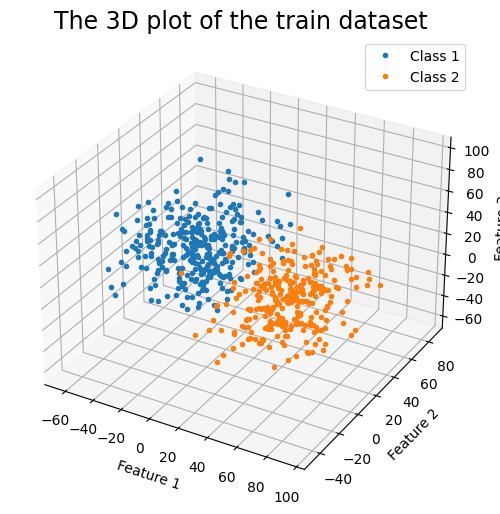

In [5]:
# Load the train, validation, test dataset.
train = np.load("./drive/MyDrive/Dataset1(Train).npy")
validation = np.load("./drive/MyDrive/Dataset1(Validation).npy")
test = np.load("./drive/MyDrive/Dataset1(Test).npy")

# Set the X, y data for each dataset.
X_train = train[:, :-1]
y_train = train[:, -1]

X_val = validation[:, :-1]
y_val = validation[:, -1]

X_test = test[:, :-1]
y_test = test[:, -1]

# Visualize the train dataset.
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_train[:, 0][y_train == -1], X_train[:, 1][y_train == -1], X_train[:, 2][y_train == -1], '.', label="Class 1")
ax.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], X_train[:, 2][y_train == 1], '.', label="Class 2")
plt.title("The 3D plot of the train dataset", fontsize=17)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.grid()
ax.legend()
plt.show()

In [6]:
# Check the size of each dataset.
print("The shape of the train dataset\t\t: %s\t | The shape of train label\t\t: %s"%(X_train.shape, y_train.shape))
print("The shape of the validation dataset\t: %s\t | The shape of validation label\t: %s"%(X_val.shape, y_val.shape))
print("The shape of the test dataset\t\t: %s\t | The shape of test label\t\t: %s"%(X_test.shape, y_test.shape))

The shape of the train dataset		: (600, 3)	 | The shape of train label		: (600,)
The shape of the validation dataset	: (200, 3)	 | The shape of validation label	: (200,)
The shape of the test dataset		: (200, 3)	 | The shape of test label		: (200,)


### Step 3. Train and test the soft margin SVM models with different learning rates.
Check the tendency of the loss value that changes with the different learning rates. Visualize the result of the SVM models with the different learning rates.

In [7]:
np.random.seed(111)

# Set variables(hyperparameters) to train our SVM model.
lr = 1e-4
epochs = 100
reg = 1

train_setting = {"lr": [1e-2, 1e-3]}
models = []
for i, lr in enumerate(train_setting["lr"]):
    # Build our SVM model.
    model = SVM(X_train, reg)
    # Start train our SVM model.
    model.train(X_train, y_train, lr=lr, epochs=epochs)

    # Predict the results using our trained SVM model.
    train_predicted = model.predict(X_train)
    # Compute the accuracy of prediction for the train set
    acc = model.accuracy(train_predicted, y_train)
    print("\n- The accuracy of the train set \t: %.3f"%acc)

    val_predicted = model.predict(X_val)
    acc = model.accuracy(val_predicted, y_val)
    print("- The accuracy of the validation set \t: %.3f"%acc)
    print("-"*50,"\n")
    models.append((model, lr))

-------------------------------------------------- 
Initialize the parameters of our SVM.

- Total Epochs 		:  100
- Learning rate 	:  0.01
--------------------------------------------------
[Epoch : 10/100]		| Cost: 61.6495
[Epoch : 20/100]		| Cost: 0.5366
[Epoch : 30/100]		| Cost: 0.1552
[Epoch : 40/100]		| Cost: 0.1263
[Epoch : 50/100]		| Cost: 0.1084
[Epoch : 60/100]		| Cost: 0.0970
[Epoch : 70/100]		| Cost: 0.0926
[Epoch : 80/100]		| Cost: 0.0920
[Epoch : 90/100]		| Cost: 0.0917
[Epoch : 100/100]		| Cost: 0.0916
-------------------------------------------------- 
Learning is complete.

- W 	: [ 0.06962793  0.00328596 -0.06588681]
- W_0 	: [-0.4116323]

- The accuracy of the train set 	: 0.968
- The accuracy of the validation set 	: 0.975
-------------------------------------------------- 

-------------------------------------------------- 
Initialize the parameters of our SVM.

- Total Epochs 		:  100
- Learning rate 	:  0.001
--------------------------------------------------
[E

#### Visualize a trained SVM model (idx-th) with the 3D plot

- The accuracy of prediction for the test set 	: 0.95


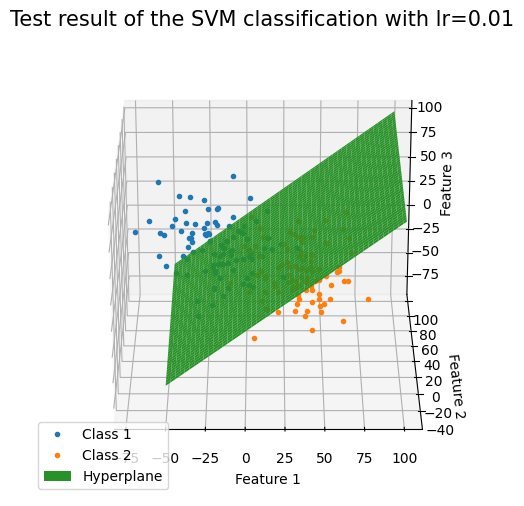

In [8]:
# Visualize a trained SVM model (idx-th) with the 3D plot
idx = 0
model = models[idx]

test_predicted = model[0].predict(X_test)
acc = model[0].accuracy(test_predicted, y_test)
print("- The accuracy of prediction for the test set \t:", acc)

# Set the axis to generate the meshgrid axis
x_axis = np.arange(-50, 100, 1)
y_axis = np.arange(-50, 100, 1)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

# Define the hyper plane, and then visualize it.
Z = - (x_axis * model[0].W[0] + y_axis * model[0].W[1] + model[0].w_0)/model[0].W[2]
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Plot the linearly separable sample datasets with the predicted labels.
ax.plot(X_test[:, 0][y_test == -1], X_test[:, 1][y_test == -1], X_test[:, 2][y_test == -1], '.', label="Class 1")
ax.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], X_test[:, 2][y_test == 1], '.', label="Class 2")
label = "Hyperplane"
plane = ax.plot_surface(x_axis, y_axis, Z, label = label)
plane._facecolors2d = plane._facecolor3d
plane._edgecolors2d = plane._edgecolor3d

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.view_init(25,-90)
ax.grid()
ax.legend(loc='lower left')
plt.title("Test result of the SVM classification with lr=0.01", fontsize=15)
plt.show()

- The accuracy of prediction for the test set 	: 0.905


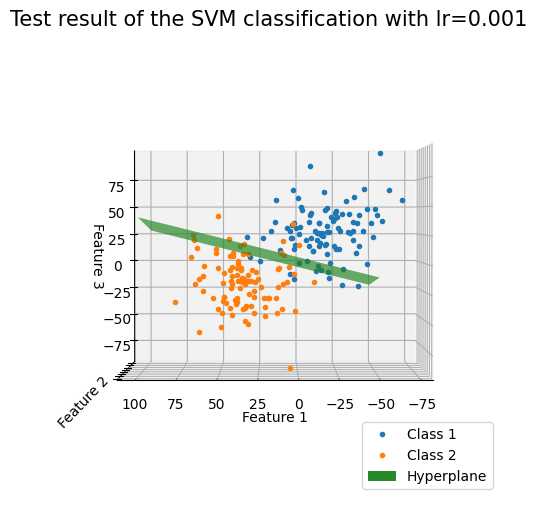

In [9]:
# Visualize a trained SVM model (idx-th) with the 3D plot
idx = 1
model = models[idx]

test_predicted = model[0].predict(X_test)
acc = model[0].accuracy(test_predicted, y_test)
print("- The accuracy of prediction for the test set \t:",acc)

# Set the axis to generate the meshgrid axis
x_axis = np.arange(-50, 100, 1)
y_axis = np.arange(-50, 100, 1)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

# Define the hyper plane, and then visualize it.
Z = -(x_axis * model[0].W[0] + y_axis * model[0].W[1] + model[0].w_0) / model[0].W[2]
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# Plot the linearly separable sample datasets with the predicted labels.
ax.plot(X_test[:, 0][y_test == -1], X_test[:, 1][y_test == -1], X_test[:, 2][y_test == -1], '.', label="Class 1")
ax.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], X_test[:, 2][y_test == 1], '.', label="Class 2")
label = "Hyperplane"
plane = ax.plot_surface(x_axis, y_axis, Z, label = label)
plane._facecolors2d = plane._facecolor3d
plane._edgecolors2d = plane._edgecolor3d

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.yaxis.set_ticklabels([])
ax.set_zlabel('Feature 3')
ax.view_init(1,90)
ax.grid()
ax.legend(loc='lower right')
plt.title("Test result of the SVM classification with lr=0.001", fontsize=15)
plt.show()

## **[Step 4-6] Kernel SVM implementation**

In this assignment, you should use only NumPy and CVXOPT to build the Kernel SVM models.

**DO NOT** use other libraries to implement the Kernel SVM models.

**DO NOT** modify other parts of the skeleton code.

Follow the comments. They'll give you instructions on what to code.

### Step 4. Build the Kernel SVM models based on the dual form
The followings are the skeleton codes. Implement the functions inside the ```kernels``` class and the ```Kernel_SVM```.

In [10]:
class kernels:
    # Function for computing the kernel matrix
    def __init__(self, poly_c=10, poly_d=2, gamma=0.001):
        self.poly_c = poly_c
        self.poly_d = poly_d
        self.gamma = gamma

    # Function for the polynomial kernel.
    def polynomial_kernel(self, x, y, c=10, d=2):
        # Implement the polynomial kernel function
        ####################### IMPLEMENT HERE #######################
        result = (c+x.dot(y))**d  #polynomial kernel 식 7장 p85
        ##############################################################
        return result

    # Function for the gaussian kernel.
    def gaussian_kernel(self, x, y, gamma=0.001):
        # Implement the linear kernel function.
        # Gamma means 1/(2*sigma**2) where sigma is a free parameter.
        # It can be seen as the standard deviation of the gaussian distribution.
        ####################### IMPLEMENT HERE #######################
        result = np.linalg.norm(np.array(x)-np.array(y), ord=None)**2 #***
        result = np.exp(-gamma*result)  #gaussian kernel 식 7장 p85
        ##############################################################
        return result

# Function for computing the kernel matrix
def compute_inner_matrix(X_data, kernel):
    # Generate the kernel matrix using the kernel function.
    n = X_data.shape[0]
    inner_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            ####################### IMPLEMENT HERE #######################
            inner_matrix[i,j] = kernel(X_data[i], X_data[j])  #kernel method의해 xi*xj = k(xi,xj)로 다 바꿔줌
            ##############################################################
    return inner_matrix

In [21]:
class Kernel_SVM:
    def __init__(self, kernel, threshold_SV):
        # Set the parameters as the hinstance variables.
        self.kernel = kernel
        self.threshold_SV = threshold_SV

    # Function for computing the lagrangian multiplier vector.
    def compute_lagrange(self, X_data, y_label):
        # Here we will use the cvxopt python library. We will use its matrix objects cvx.matrix
        ####################### IMPLEMENT HERE #######################
        # Compute the kernel matrix using kernel function.
        kernel_matrix = compute_inner_matrix(X_data, self.kernel)

        #가이드 p6의 cvx.sovlers.qp 식 & 7장 p88 dual svm 식 확인
        #위 식에 맞게 p, q, g, h, a, b 정의  / cvx.solvers.qp의 x가 여기서 alpha에 해당
        # Compute P matrix using y_label vectors and kernel_matrix.
        P = cvx.matrix(np.outer(y_label, y_label)*kernel_matrix, tc='d')  #***
        # Set ones vector to compute the sum of the alpha vector.
        q = cvx.matrix(-np.ones(X_data.shape[0]), tc='d')

        # Set the identity metrix for our inequality constraint
        # that all elements of the alpha vector should be greater then equal to zero.
        G = cvx.matrix(-np.identity(X_data.shape[0]), tc='d')
        h = cvx.matrix(np.zeros(X_data.shape[0]), tc='d')

        # Set the y_label vector for our equality constraint
        # that tha result of the multiplication of elements of the alpha and y_label vector should be zero.
        A = cvx.matrix(y_label, (1, X_data.shape[0]), tc='d')
        b = cvx.matrix(0.)
        ##############################################################

        # Compute the alpha vector. Refer to the instruction slides.
        alpha = np.array(cvx.solvers.qp(P, q, G, h, A, b)['x']).flatten()

        return alpha

    # Function for training.
    def train(self,X_data, y_label):
        # Compute the alpha vector using compute_lagrange function.
        self.alpha = self.compute_lagrange(X_data, y_label)

        ####################### IMPLEMENT HERE #######################
        # Set the alpha values that are greater than the threshold.
        self.alpha_support = self.alpha[self.alpha>self.threshold_SV]
        # Set the support vectors corresponding to the value of alpha that is greater than the threshold.
        self.support_vectors = X_data[np.argwhere(self.alpha>self.threshold_SV)].reshape(-1, X_data.shape[1]) #*** #조건에 맞는 alpha가진 index 선택해 x추출
        # Set the labels of the support vectors corresponding to the alpha value that is greater than the threshold.
        self.support_vectors_labels = y_label[np.argwhere(self.alpha>self.threshold_SV)] #조건에 맞는 alpha가진 index 선택해 y추출
        ##############################################################

    # Function for prediction.
    def predict(self,x_data):
        # Compute our kernel SVM prediction, and transform it to the binary label.
        # And then append it to the list.
        y_pred = [] # It represents the predicted label of each data point,
        pred = [] # it represents the output value of each data point. (without sign function)
        for i in range(x_data.shape[0]):
            # Compute the bias vector to predict the label of each data point.
            self.bias = 0
            for (alpha, x_, y_) in zip(self.alpha_support, self.support_vectors, self.support_vectors_labels):
                ####################### IMPLEMENT HERE #######################
                # Compute the output value of kernel SVM model.
                self.bias += y_-alpha*y_*self.kernel(x_, x_data[i])
                ##############################################################
            ####################### IMPLEMENT HERE #######################
            self.bias /= len(self.alpha_support)  #loss의 평균을 bias로 사용하기
            output = self.bias
            ##############################################################
            for (alpha, x_, y_) in zip(self.alpha_support, self.support_vectors, self.support_vectors_labels):
                ####################### IMPLEMENT HERE #######################
                # Compute the output value of our prediction
                output += alpha*y_*self.kernel(x_, x_data[i]) #7장 p88 식
                ##############################################################
            # Using sign function, transform our prediction to the binary label.
            y_pred.extend(np.sign(output))
            pred.extend(output)

        return y_pred, pred

    # Function for evaluation.
    def accuracy(self, predict, y_label):
        result = np.sum(predict == y_label) / len(predict)
        return result

### Step 5. Load the dataset 2
The dataset is the  isotropic Gaussian blobs with noise for classification. Load the dataset and split it into the train and test set by executing the provided code.

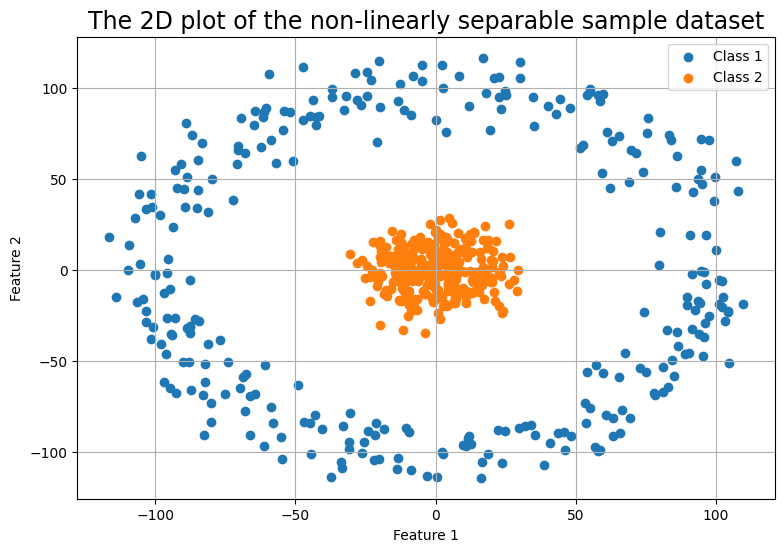

In [22]:
# Load the train, validation, test dataset.
train = np.load("./drive/MyDrive/Dataset2(Train).npy")
validation = np.load("./drive/MyDrive/Dataset2(Validation).npy")
test = np.load("./drive/MyDrive/Dataset2(Test).npy")


# Set the X, y data for each dataset.
X_train = train[:, :-1]
y_train = train[:, -1]
X_val = validation[:, :-1]
y_val = validation[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

# Visualize the train dataset.
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], label="Class 1")
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label="Class 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.title("The 2D plot of the non-linearly separable sample dataset", fontsize=17)
plt.grid()
plt.legend()
plt.show()

In [23]:
# Check the size of each dataset.
print("The shape of the train dataset\t\t: %s\t | The shape of train label\t\t: %s"%(X_train.shape, y_train.shape))
print("The shape of the validation dataset\t: %s\t | The shape of validation label\t: %s"%(X_val.shape, y_val.shape))
print("The shape of the test dataset\t\t: %s\t | The shape of test label\t\t: %s"%(X_test.shape, y_test.shape))

The shape of the train dataset		: (600, 2)	 | The shape of train label		: (600,)
The shape of the validation dataset	: (200, 2)	 | The shape of validation label	: (200,)
The shape of the test dataset		: (200, 2)	 | The shape of test label		: (200,)


### Step 6. Train and test the Kernel SVM models with different types of kernels
Check the accuracy of the Kernel SVM model with different types of kernels.

- The performance of **the Polynomial Kernel SVM models** varies depending on the kernel’s hyperparameters ```poly_c``` and ```poly_d```.
- The performance of **the Gaussian Kernel SVM models** varies depending on the kernel’s hyperparameter ```gamma```.

#### Train the Gaussian Kernel SVM model with the different hyperparameters.

In [24]:
# Feel free to experiment with hyperparameters
# Default values of the hyperparametes are as belows:
gamma = 0.001

utils_ = kernels(gamma=gamma)
kernel = utils_.gaussian_kernel

# Initialize the kernel SVM model, and then train it.
Gaussian_kernel = Kernel_SVM(kernel=kernel, threshold_SV=10**(-3))
Gaussian_kernel.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -5.4159e+00 -1.7244e+01  8e+02  2e+01  1e+00
 1: -5.3661e-01 -2.0186e+01  6e+01  1e+00  7e-02
 2: -3.0853e+00 -1.1926e+01  1e+01  2e-01  9e-03
 3: -4.7008e+00 -7.5822e+00  3e+00  3e-02  2e-03
 4: -5.3353e+00 -6.3588e+00  1e+00  3e-03  2e-04
 5: -5.7337e+00 -6.0531e+00  3e-01  7e-05  4e-06
 6: -5.8788e+00 -5.9579e+00  8e-02  3e-16  6e-16
 7: -5.9185e+00 -5.9427e+00  2e-02  3e-16  6e-16
 8: -5.9360e+00 -5.9390e+00  3e-03  6e-16  7e-16
 9: -5.9385e+00 -5.9386e+00  9e-05  2e-16  7e-16
10: -5.9386e+00 -5.9386e+00  4e-06  4e-16  7e-16
Optimal solution found.


#### Evaluate the Gaussian Kernel SVM model

In [25]:
# Predict the results using our trained SVM model.
train_predicted, pred = Gaussian_kernel.predict(X_train)
# Compute the accuracy of prediction for the train set
acc = Gaussian_kernel.accuracy(train_predicted, y_train)
print("- The accuracy of prediction for the train set \t\t:",acc)

val_predicted, pred = Gaussian_kernel.predict(X_val)
acc = Gaussian_kernel.accuracy(val_predicted, y_val)
print("- The accuracy of prediction for the validation set \t:",acc)

- The accuracy of prediction for the train set 		: 1.0
- The accuracy of prediction for the validation set 	: 1.0


#### Visualize the result of the Gaussian Kernel SVM classification

- The accuracy of prediction for the test set 	: 1.0


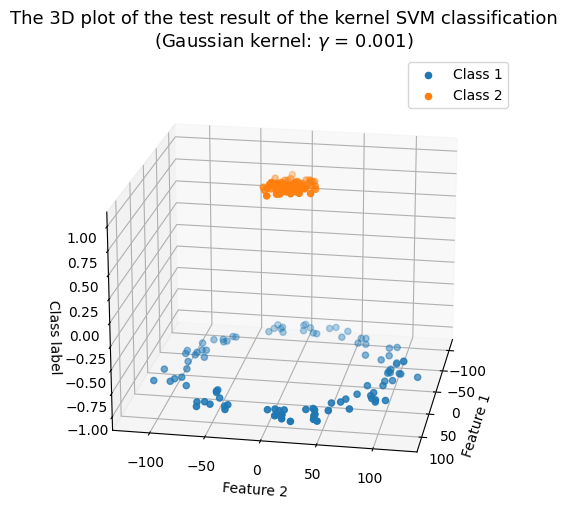

In [26]:
from matplotlib import cm
Z, _ = Gaussian_kernel.predict(X_test)
acc = Gaussian_kernel.accuracy(Z, y_test)
print("- The accuracy of prediction for the test set \t:",acc)
Z = np.array(Z)
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], Z[y_test == -1], label="Class 1")
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], Z[y_test == 1], label="Class 2")

plt.title("The 3D plot of the test result of the kernel SVM classification\n(Gaussian kernel: $\gamma$ = 0.001)", fontsize=13)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class label')
ax.view_init(20,10)
ax.grid()
ax.legend()
plt.show()

#### Train the Polynomial Kernel SVM model with the different hyperparameters.

In [27]:
# Chose which kernel to use.
# Feel free to experiment with hyperparameters
# Default values of the hyperparametes are as belows:
poly_c = 10
poly_d = 2

utils_ = kernels(poly_c=poly_c, poly_d=poly_d)
kernel = utils_.polynomial_kernel

# Initialize the kernel SVM model, and then train it.
Polynomial_kernel = Kernel_SVM(kernel=kernel, threshold_SV=10**(-10))
Polynomial_kernel.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -4.5242e+01 -9.0694e+01  2e+03  5e+01  2e+00
 1: -5.0317e+01 -3.4769e+01  8e+02  2e+01  7e-01
 2: -2.3754e+01 -7.2496e+00  4e+02  7e+00  3e-01
 3: -1.9934e+00 -3.5576e-02  3e+01  4e-01  2e-02
 4: -2.0058e-02 -4.4343e-06  3e-01  4e-03  2e-04
 5: -2.0246e-04 -8.2978e-07  3e-03  4e-05  2e-06
 6: -3.8333e-06 -8.1200e-07  5e-05  8e-07  4e-08
 7: -6.2204e-07 -6.2697e-07  1e-05  1e-07  6e-09
 8:  8.5374e-08 -5.0263e-07  6e-07  2e-22  1e-14
 9: -9.5099e-08 -2.1198e-07  1e-07  1e-22  3e-15
10: -1.2504e-07 -2.4074e-07  1e-07  1e-22  3e-15
11: -1.9125e-07 -2.0848e-07  2e-08  4e-23  3e-15
Optimal solution found.


#### Evaluate the Polynomial Kernel SVM model

In [28]:
# Predict the results of the polynomial kernel SVM model.
train_predicted, pred = Polynomial_kernel.predict(X_train)
# Compute the accuracy of prediction for the train set
acc = Polynomial_kernel.accuracy(train_predicted, y_train)
print("- The accuracy of prediction for the train set \t\t:",acc)

val_predicted, pred = Polynomial_kernel.predict(X_val)
acc = Polynomial_kernel.accuracy(val_predicted, y_val)
print("- The accuracy of prediction for the validation set \t:",acc)

- The accuracy of prediction for the train set 		: 1.0
- The accuracy of prediction for the validation set 	: 1.0


#### Visualize the result of the Polynomial Kernel SVM classification

- The accuracy of prediction for the test set 	: 1.0


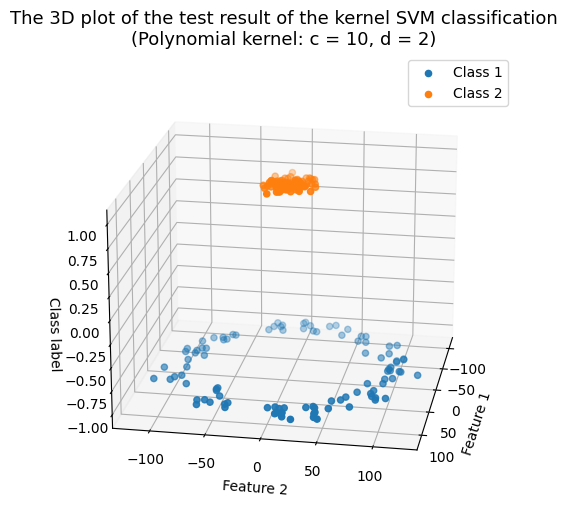

In [29]:
Z, _ = Polynomial_kernel.predict(X_test)
acc = Polynomial_kernel.accuracy(Z, y_test)
print("- The accuracy of prediction for the test set \t:",acc)
Z = np.array(Z)
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], Z[y_test == -1], label="Class 1")
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], Z[y_test == 1], label="Class 2")

plt.title("The 3D plot of the test result of the kernel SVM classification\n(Polynomial kernel: c = 10, d = 2)", fontsize=13)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class label')
ax.view_init(20, 10)
ax.grid()
ax.legend()
plt.show()